# 04 – Classification

In this exercise, we will train a classification model to predict categorical targets.

Note: make sure to run all Code cells from the beginning at least once to load the required data. Use `random_state=42` where random numbers are used to ensure determinism, i.e. reproducibility.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### The MNIST handwritten digits dataset

For this exercise we will use the famous MNIST digits dataset, which was presented in the lecture. The task is to classify images of 28x28 pixels into one of the 10 classes (digits 0 to 9).

Scikit-learn can easily load the dataset for us:

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1) # ('MNIST original')
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X_train, X_test, y_train, y_test = X[:600], X[600:], y[:600], y[600:]

## MNIST is already shuffled (see HOML2 S. 91)
# from sklearn.utils import shuffle
# X_train, y_train = shuffle(X_train, y_train)

X_train.shape, y_train.shape

((600, 784), (600,))

To get a sense of the data, we'll look at one of the training samples. As you can see, the images are rows of 784 elements in the `X` matrix, so we have to reshape it to the original 28x28 image for plotting.

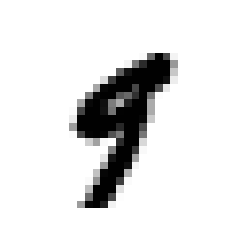

In [5]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off");

In [6]:
y[36000]

'9'

As you can see, the labels are stored as strings, not as numbers. So let's convert those to integers:

In [7]:
y = y.astype(np.uint8)
y[36000]

9

### Exercise

Use python to inspect the MNIST dataset you downloaded above concerning its number of instances (available for training and testing), number of features and their value ranges.

In [8]:
import numpy as np
import pandas as pd

In [9]:
print("number of instances")
print(len(mnist["data"]))

number of instances
70000


In [10]:
print("number of features")
print(len(mnist.feature_names))

number of features
784


In [11]:
print("values ranges")
print(some_digit_image.max(),some_digit_image.min())

values ranges
255.0 0.0


### Questions

1. How many instances has the MNIST dataset?
2. How many features has the MNIST dataset? Why?
3. What is the value range of the features of the MNIST dataset? Why?
4. How many label does the dataset have?
5. Are we bound to use semi-supervised learning methods?

### Answer

1. 70000
2. 784 Es handelt sich um ein Bild mit 28x28 Pixel. 28*28=784 ist. 
3. 0-255 Jedes feature eines Datensatzes enspricht einem Pixel, dieser kann in einem Werte Bereich von 0-255 liegen.
4. 10 ,da der Zahlen bereich von 0-9 geht.
5. Nein, alle Daten sind zugeordnet.

### Exercise

Train a simple `SGDClassifier` with `loss="hinge", random_state=42` (default parameters otherwise) on the training set and compute the [F1-Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) **per class** on the test set.\
Time both the execution of the training and the testing using `%time` before the actual code line.

Then [plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html) the test set [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), with rows being the true class and columns being the predicted classes. 

*Hint:* set the diagonal elements of the matrix [to zero](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fill_diagonal.html) to make the errors more visible.

In [12]:
## train SGD and then predict labels for the test set 
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='hinge',random_state=42)
%time sgd.fit(X_train, y_train)
%time y_pred = sgd.predict(X_test)
%time y_pred = sgd.predict(X_test)

CPU times: user 111 ms, sys: 0 ns, total: 111 ms
Wall time: 111 ms
CPU times: user 856 ms, sys: 188 ms, total: 1.04 s
Wall time: 517 ms
CPU times: user 1.01 s, sys: 280 ms, total: 1.29 s
Wall time: 540 ms


In [13]:
## F1-score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.9190911 , 0.93733484, 0.8320975 , 0.81607658, 0.80360602,
       0.69490952, 0.87514318, 0.85281903, 0.71189339, 0.71478285])

In [14]:
## generate confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test, y_pred)

(<matplotlib.image.AxesImage at 0x7f7cad7c6090>,
 Text(0, 0.5, 'Actual'),
 Text(0.5, 0, 'Predicted'))

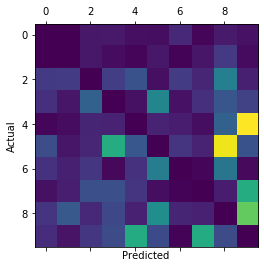

In [15]:
## plot confusion matrix
np.fill_diagonal(conf_mat, 0)
matshow(conf_mat), ylabel("Actual"), xlabel("Predicted")

### Questions

- Looking at your confusion matrix, which seems to be the most common mistake of the classifier? 
- Why do you think it makes this mistake?

#### Answer
1) Die meisten Fehler liegen bei 8 und 9.#

2) Da eine 8 sowohl als eine 3, 6 oder auch 9 interpretiert werden kann, ist hier die Verwechslungsgefahr größer. 

### Exercise

Now use the function of scikit-learn to do a 4-fold CV on the same classifier, with `scoring="accuracy"` and `n_jobs=-1` to make use of all your CPU cores and time the execution.

In [16]:
## CV
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scores = cross_validate(sgd, X_test, y_test,cv=4, n_jobs=-1,scoring="accuracy")
print(scores)

{'fit_time': array([176.61761928, 171.47721434, 183.4586668 , 184.36421227]), 'score_time': array([0.07451415, 0.09155917, 0.04898739, 0.04349589]), 'test_score': array([0.86349755, 0.83586906, 0.87231222, 0.8557016 ])}


### Question

Independent of your timing result: On a machine with 4 CPU cores the 4-fold CV is generally faster than the training with `clf.fit(X_train, y_train)`.\
Why?

### Answer
Durch die Aufteilung auf die 4 Kerne, können die Daten schneller mit Cross_val erfasst werden.


### Exercise
Now scale the data to zero mean and unit variance. Use the scikit-learn function `StandardScaler` for that.\
Then run 4-fold CV again and plot the confusion matrix (as above).

In [17]:
## scale features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)

In [18]:
## CV/train SGD from above again with scaled features
sgd=SGDClassifier(loss="hinge", random_state=42)
%time sgd.fit(X_train_scale, y_train)
%time y_pred = sgd.predict(X_test)
%time y_pred = sgd.predict(X_test)

%time scores = cross_validate(sgd, X_test, y_test, cv=4, n_jobs=-1, scoring="accuracy")
print(scores)

CPU times: user 111 ms, sys: 174 µs, total: 111 ms
Wall time: 109 ms
CPU times: user 905 ms, sys: 91.8 ms, total: 996 ms
Wall time: 511 ms
CPU times: user 999 ms, sys: 279 ms, total: 1.28 s
Wall time: 534 ms
CPU times: user 723 ms, sys: 312 ms, total: 1.04 s
Wall time: 2min 51s
{'fit_time': array([159.60237288, 156.22412705, 170.25915217, 170.28402519]), 'score_time': array([0.0509212 , 0.07766008, 0.04907322, 0.04557395]), 'test_score': array([0.86349755, 0.83586906, 0.87231222, 0.8557016 ])}


(<matplotlib.image.AxesImage at 0x7f7cac6ed0d0>,
 Text(0, 0.5, 'Actual'),
 Text(0.5, 0, 'Predicted'))

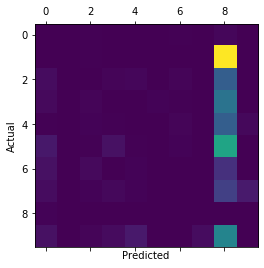

In [19]:
## confusion matrix plot
conf_mat=confusion_matrix(y_test, y_pred)
np.fill_diagonal(conf_mat, 0)
matshow(conf_mat), ylabel("Actual"), xlabel("Predicted")

### Questions

1. Which learning algorithm does the `SGDClassifier` use under the hood in this example? 
2. Why does the scaling improve the result?

### Answer
1) gradient descent

2) durch Standardisierung der Daten, was die Rechenzeit verringert.

### Exercise

Train a `DecisionTreeClassifier` (dt) on the training set and compute the `macro` averaged F1-Score on the test set. **Make sure to avoid overfitting by using the regularization hyper-parameters!** (You can also use GridSearch to find good parameters)

In [29]:
## train dt and then predict labels for the test set
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier(random_state=42)
gsc=GridSearchCV(dtc,param_grid={'max_features':[9]})
%time gsc.fit(X_train, y_train)
%time y_gsc_pred = gsc.predict(X_test)

CPU times: user 44.9 ms, sys: 60 µs, total: 45 ms
Wall time: 42.8 ms
CPU times: user 91.6 ms, sys: 36 ms, total: 128 ms
Wall time: 127 ms


/home/jan/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/jan/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
## averaged F1-Score on the test set
f1_score(y_test, y_gsc_pred, average=None)

array([0.61685824, 0.84358545, 0.54474882, 0.42020335, 0.48848504,
       0.3370089 , 0.5709353 , 0.63307762, 0.39208551, 0.42884672])

### Exercise

Train a Random Forest classifier `RandomForestClassifier` (rf) and an Extra-Trees classifier `ExtraTreesClassifier` (et), each with 100 estimators and `random_state=42` (for determinism).

In [22]:
## instanciate rf and et
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
rfc = RandomForestClassifier(random_state=42)
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [23]:
## train rf and et 
%time rfc.fit(X_train, y_train)
%time etc.fit(X_train, y_train)

/home/jan/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 40.8 ms, sys: 4.07 ms, total: 44.9 ms
Wall time: 46.3 ms
CPU times: user 264 ms, sys: 4 µs, total: 264 ms
Wall time: 262 ms


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [24]:
## predict labels for the test set
%time y_rfc_pred = rfc.predict(X_test)
%time y_etc_pred = etc.predict(X_test)

CPU times: user 229 ms, sys: 23.8 ms, total: 253 ms
Wall time: 251 ms
CPU times: user 1.55 s, sys: 24 ms, total: 1.58 s
Wall time: 1.58 s


### Exercise

Compute the `accuracy_score` on the test set for each of the 4 classifiers from Exercise 1-4.

Then, combine the 4 classifiers into one `VotingClassifier` (vc) ensemble and compute the accuracy on the test set for this ensemble.

In [25]:
## socre all
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_gsc_pred))
print(accuracy_score(y_test, y_rfc_pred))
print(accuracy_score(y_test, y_etc_pred))

0.5468731988472623
0.5368587896253603
0.7525360230547551
0.8648703170028819


In [26]:
## train vc
from sklearn.ensemble import VotingClassifier
voc = VotingClassifier(estimators=[('sgd', sgd), ('gsc', gsc), ('rfc', rfc), ('etc', etc)], voting='hard')
%time voc = voc.fit(X_train, y_train)

/home/jan/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/jan/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 430 ms, sys: 101 µs, total: 430 ms
Wall time: 427 ms


In [27]:
## predict labels for the test set
%time y_voc_pred = voc.predict(X_test)
print(accuracy_score(y_test, y_voc_pred))

CPU times: user 3.66 s, sys: 328 ms, total: 3.99 s
Wall time: 3.22 s
0.8398559077809798


### Question

All four classifiers in the ensemble were trained on the same dataset (ie., no bagging, pasting, boosting). Could an ensemble still achieve a higher prediction accuracy than the individual classifiers (regardless of whether it actually happened here)? Why?

#### Answer
Ja, wenn speziell auf die Daten ein trainiertes Modell erstellt werden würde.
Bei den verwendeten Modellen hängt die Einteilung jeder Klasse von der Gewichtung vom Durchschnittsparameter ab.


### Optional

Construct a Gaussian kernel [Support Vector Machine](http://scikit-learn.org/stable/modules/svm.html) with `C=5, gamma=0.05` and check if the `VotingClassifier` can be improved with that additional classifier (this increases the compute time by about 30 minutes or longer).